In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns
import pandas as pd
import plotly.express as px

## Preparing our dataset 
Applying Rescaling

In [3]:
#read ex1data2.txt file where first two columns are X1 and X2 and last column is Y
df = pd.read_csv('ex1data2.txt', header=None)
#rescale the data to be between 0 and 1
df = (df - df.mean()) / df.std()

df.columns = ['Area', 'Bedrooms', 'Prices(1000$)']
#divide the last column by 1000 to get the prices in 1000$
#df['Prices(1000$)'] = df['Prices(1000$)'] / 1000
df.head()

,Area,Bedrooms,Prices(1000$)
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(47, 2) (47,)


## Locally Weighted Algorithm
![alt text](locally_weighted.jpg "Batch_Gradient")

## Calculating Weights
![alt text](weights.jpg "Batch_Gradient")

In [5]:
#function to calculate weights
def wi(x,X,tau):
    '''
    function to calculate weights

    Arguments:
    x -- x where we want to predict
    X -- training set
    tau -- value of tau

    Returns:
    w -- weight
    '''
    # calculate the length of the training set
    n = X.shape[0]
    #initialize the weights 
    w = np.mat(np.eye(n))
   # Calculating weights for all training examples [x(i)'s].
    for i in range(n): 
        xi = X[i] 
        #print(xi, x)
        d = (-2 * tau * tau) 
        #print(xi.shape, x.shape)
        w[i, i] = np.exp(np.dot((xi-x), (xi-x).T)/d) 
        
    return w
    

## Predict Function

In [6]:
def predict(X,y,x,tau):
    '''
    function to predict the value of x

    Arguments:
    X -- training set
    y -- target values
    x -- x where we want to predict
    tau -- value of tau

    Returns:
    y_pred -- predicted value
    '''
    # calculate the length of the training set
    m = X.shape[0] 
        
    # Appending a cloumn of ones in X to add the bias term.
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
        
    # point is the x where we want to make the prediction. 
    #add  1 to the end of the point to add the bias term
    x_ = np.append(arr = x, values = 1)
    # x_ = np.array([x,1])
    
    #print(x_)
    # Calculating the weight matrix using the wm function we wrote      #  # earlier. 
    
    w = wi(x_, X_, tau) 
        
    # Calculating parameter theta using the formula.
    #print the shapes of X_ and w
 
    # #reshape y to 47x1
    y = y.reshape(m,1)
    #print(X_.shape, w.shape,y.shape)
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T*(w * y))
     
        
    # Calculating predictions.  
    # convert thets to be a row vector
    
    #print("------",theta.shape)
    pred = np.dot(x_, theta)
    
   

    # # get the predicted value from pred
    y_pred = pred[0,0]
    #print(type (pred), y_pred)
    # Returning the theta and predictions 
    # print(theta.shape)
    return theta, y_pred

## Plot the Predictions
We are Predicting for all data present in Dataset

In [7]:
#function to plot the predictions using predict function
def plot_predictions(X,y,tau,nval):
    '''
    function to plot the predictions

    Arguments:
    X -- training set
    y -- target values
    tau -- value of tau

    Returns:
    None
    '''
    # X_test = np.linspace(-3, 3, nval) 
    
   # Empty list for storing predictions. 
    preds = [] 
    m= X.shape[0]
    #X_test = np.append(X, np.ones(m).reshape(m,1), axis=1)
   # Predicting for all nval values and storing them in preds. 
    for point in X: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)
        
    
    return preds
    
    
    

[0.4575533319487154, -0.42605025882952063, 0.28353960869157446, -0.8626609554798721, 1.5953899564242393, -0.4600070950285583, -0.3477357674758069, -0.5816599233398176, -0.7499149975452299, -0.34413273622245444, -0.5455150468811526, 0.10334996397155444, -0.14269171835719913, 2.8749810389693313, -0.8169967125790143, 0.8707072459594065, -0.3240006870931027, -0.786196228621691, 1.2757775081419247, 2.068038592867005, -0.6194807454435239, -0.6660472125988506, -0.4330482845524347, -0.523896553534446, 1.8673026865652198, -0.7022713769060193, -0.42190872859955464, 0.745081682269906, 0.5363965527583022, -0.32150588169604966, -0.06650957899549326, -1.3636659989209765, -0.29441157651634003, 1.9503486184936554, -0.3785805149799995, -0.5243614124187022, -0.7910194835080115, -0.17985145909641448, 1.6681662502567882, -0.12850419329418336, 0.22338757725868874, 0.3117390615506177, -0.19993252386375815, -0.7187863922264082, -1.2837860947588144, -0.43238040943077455, -0.7237346087004237]


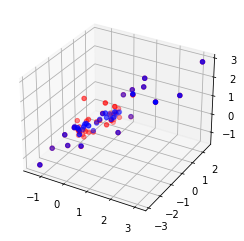

In [8]:
# np.random.seed(8)
# X = np.random.randn(1000,1)
# y = 2*(X**3) + 10 + 4.6*np.random.randn(1000,1)
nval = len(X)
tau = 0.08
p = plot_predictions(X,y,tau,nval)
print(p)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='r', marker='o')
ax.scatter(X[:,0], X[:,1], p, c='b', marker='o')
plt.show()

## Plotly 3D Plot
To plot using Plotly we will need to creat a new dataframe with a new feature "label"

In [9]:
#add one column at the end of df 
df['label'] = 'original'

In [10]:
#create a new dataframe with the predictions and the actual values
df_pred = pd.DataFrame(p)
df_pred.columns = ['Prices(1000$)']
df_pred['Area'] = df['Area']
df_pred['Bedrooms'] = df['Bedrooms']
df_pred['label']='Predicted'

In [11]:
#append rows of df_pred to df
df = df.append(df_pred, ignore_index=True)
df

,Area,Bedrooms,Prices(1000$),label
0,0.130010,-0.223675,0.475747,original
1,-0.504190,-0.223675,-0.084074,original
2,0.502476,-0.223675,0.228626,original
3,-0.735723,-1.537767,-0.867025,original
4,1.257476,1.090417,1.595389,original
...,...,...,...,...
89,0.712618,1.090417,-0.199933,Predicted
90,-1.007523,-0.223675,-0.718786,Predicted
91,-1.445423,-1.537767,-1.283786,Predicted
92,-0.187090,1.090417,-0.432380,Predicted


In [12]:
#plot the dataframe using plotly
fig = px.scatter_3d(df, x="Area", y="Bedrooms", color="label",z="Prices(1000$)" )
fig.show()
